# Red-Wine quality

ในบทนี้ เราจะทำการประมาณการคุณภาพของ red-wine โดยใช้ decision tree ซึ่งปกติแล้ว เราจะแบ่งกลุ่มข้อมูลออกเป็น 2 กลุ่ม แต่รอบนี้เราจะแบ่งมากกว่า 2 กลุ่ม (multi-class)

## 1.เตรียมข้อมูล

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('https://github.com/Siriratkant/Decision-tree/raw/master/winequality-red.csv')
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


**description**
* fixed acidity : most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
* volatile acidity : the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
* citric acid : found in small quantities, citric acid can add 'freshness' and flavor to wines
* residual sugar : the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
* chlorides : the amount of salt in the wine
* free sulfur dioxide : the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
* total sulfur dioxide : amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
* density : the density of water is close to that of water depending on the percent alcohol and sugar content
* pH : describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
* sulphates : a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
* alcohol

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [4]:
data.quality.value_counts() #ดูว่า y (quality) แบ่งออกเป็นกี่กลุ่ม โดยในที่นี้แบ่งระดับคุณภาพ red-wine เป็น 6 กลุ่ม  

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

## 2.แบ่งข้อมูล

In [5]:
data.columns 

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [6]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'] #สร้าง object ข้างในบรรจุ columns ที่เป็น feature

In [7]:
y = data.quality.values #กำหนดตัวแปร y คือ quality
x = data[columns] # กำหนดตัวแปรอิสระคือ columns ที่เราสร้างไว้บรรทัดด้านบน

In [8]:
from sklearn.model_selection import train_test_split #เรียก library sklearn และใช้ train_test_split  ในการแบ่งข้อมูลออกเป็น training set และ testing set

In [9]:
x_train, x_test, y_train, y_test = train_test_split (x,y,test_size = 0.2,random_state = 0) #สร้าง object 4 อันเพื่อบรรจุค่าข้อมูลที่มี โดยเราได้กำหนด test_size = 0.2 หรือ 20%ของข้อมูลทั้งหมด และ random_sate =0 (การใส่ค่า random แต่ละค่า จะให้ผลการแบ่งที่ต่างกัน แต่ทุกครั้งที่กด run ใหม่ มันจะ่ให้ค่าเดิมของตัวเลขนั้นๆเสมอ ) 

In [10]:
x_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
642,9.9,0.540,0.45,2.3,0.071,16.0,40.0,0.99910,3.39,0.62,9.4
679,10.8,0.260,0.45,3.3,0.060,20.0,49.0,0.99720,3.13,0.54,9.6
473,9.9,0.350,0.55,2.1,0.062,5.0,14.0,0.99710,3.26,0.79,10.6
390,5.6,0.850,0.05,1.4,0.045,12.0,88.0,0.99240,3.56,0.82,12.9
1096,6.6,0.725,0.09,5.5,0.117,9.0,17.0,0.99655,3.35,0.49,10.8


## 3. ทำการประมาณการ

In [11]:
from sklearn.tree import DecisionTreeClassifier #เรียกใช้  DecisionTreeClassifier เพื่อใช้ในการแบ่งข้อมูล

In [12]:
model=DecisionTreeClassifier(criterion='gini',min_samples_leaf = 10) #สร้าง object  ชื่อว่า model และกำหนดให้ประมาณการแบบ decision tree โดยเราได้กำหนดค่า criteria ในการแบ่งข้อมูล ว่าให้ใช้ gini 
model.fit(x_train, y_train) #คำสั่งให้ประมาณการ และข้อมูลที่ใช้ประมาณการคือ x_train,y_train ที่ได้จากการแบ่งด้านบน

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=10, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

* ค่า defult ของ DecisionTreeClassifier สามารถศึกษาเพิ่มเติมได้ที่ : https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [13]:
from sklearn.externals.six import StringIO  # StringIO จะทำหน้าที่เก็บค่าจาก export_graphviz
from sklearn.tree import export_graphviz
import pydotplus #เอาไว้แปลงข้อมูลเพื่อที่จะได้สร้างกราฟได้
from IPython.display import Image  

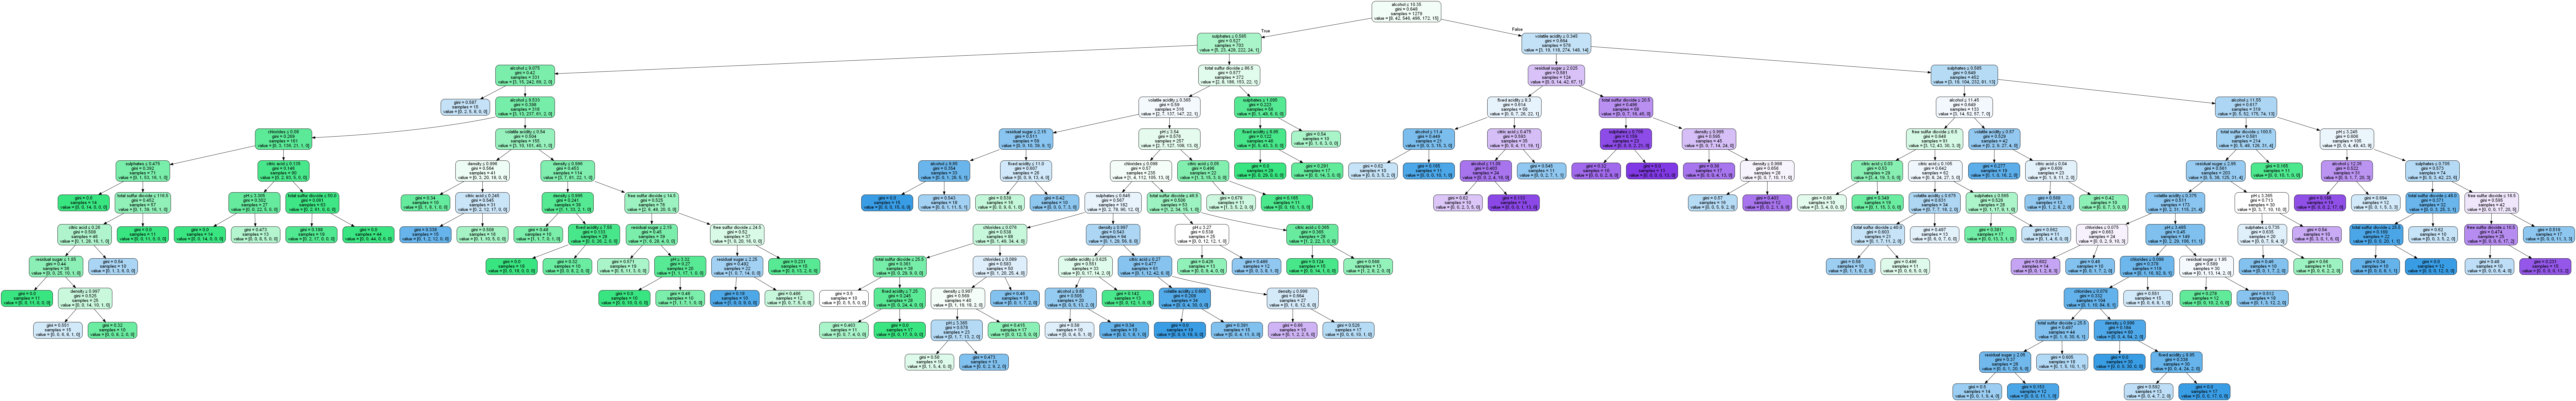

In [14]:
dot_data = StringIO() #สร้าง object ชื่อ dot_data และให้เท่ากับ StringIO
export_graphviz(model, out_file=dot_data,  #.ใส่ค่าลงไป โดยอันแรกเราก็จะใส่ model ที่เป็น object ที่เก็บค่าการประมาณการของเราไว้ และ 
                feature_names=columns, #คือ feature ที่เรามี 
                filled=True, rounded=True,  
                special_characters= True ) #เช่นพวกค่าน้อยกว่าหรือเท่ากับ

graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) #สร้าง object ชื่อ graph เพื่อใส่คำสั่ง pydotplus ซึ่งเป็นคำสั่งในการ พล็อตรูป
Image(graph.create_png()) #และเราก็ใส่คำสั่ง Imageให้มันพล็อตกราฟที่เราสร้างไว้ให้ออกมาในรูป .png 


# อ่านคำสั่งเพิ่มเติมได้ที่ :  https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

In [16]:
graph.write_png('my_decision_tree.png') #คำสั่ง save รูปเป็น png ซึ่งรูปจะเก็บอยู่ใน directory เดียวกับ notebook นี้

True

## 4. นำ model ที่ได้จากการประมาณการมาใช้กับ x_test

In [17]:
predicted = model.predict(x_test) #สร้าง object  predicted เพื่อที่จะนำ model ที่ได้จากการประมาณการข้อมูล x_train มาใช้กัข้อมูล x_test แล้วดูว่าทายผลแม่นหรือไม่
predicted

array([6, 5, 7, 5, 6, 6, 5, 6, 5, 5, 5, 5, 5, 5, 5, 7, 7, 5, 5, 6, 6, 5,
       6, 6, 5, 5, 5, 7, 5, 6, 7, 6, 5, 6, 6, 7, 5, 5, 6, 6, 5, 7, 6, 7,
       5, 5, 5, 6, 6, 6, 5, 5, 5, 6, 5, 5, 5, 5, 7, 5, 5, 6, 6, 6, 5, 6,
       5, 5, 7, 6, 6, 6, 5, 5, 6, 6, 6, 5, 5, 6, 6, 5, 6, 7, 6, 6, 6, 5,
       6, 5, 5, 5, 6, 5, 7, 6, 7, 5, 5, 5, 7, 7, 6, 7, 5, 5, 5, 6, 6, 5,
       6, 6, 7, 5, 6, 7, 5, 6, 7, 6, 5, 6, 5, 5, 6, 7, 5, 5, 6, 6, 5, 6,
       6, 5, 6, 5, 6, 5, 6, 5, 6, 5, 5, 5, 5, 6, 7, 6, 6, 5, 6, 7, 6, 5,
       5, 6, 6, 5, 6, 6, 6, 6, 5, 6, 5, 5, 6, 6, 6, 6, 6, 6, 6, 7, 6, 7,
       7, 7, 6, 5, 6, 7, 5, 6, 6, 6, 6, 6, 5, 6, 6, 5, 5, 5, 5, 5, 5, 5,
       6, 5, 5, 6, 6, 6, 5, 6, 5, 6, 7, 5, 6, 6, 5, 6, 5, 6, 5, 6, 6, 5,
       5, 6, 7, 5, 5, 6, 7, 6, 5, 5, 5, 6, 6, 6, 6, 5, 6, 6, 6, 6, 6, 5,
       5, 5, 6, 5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 6, 5, 5, 5, 6, 5, 6, 5, 6,
       6, 5, 5, 5, 6, 6, 5, 5, 5, 6, 6, 6, 7, 6, 6, 5, 5, 7, 5, 5, 6, 5,
       5, 5, 6, 6, 5, 6, 6, 5, 5, 6, 5, 6, 5, 5, 6,

In [18]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


#### หากต้องการ predict เอง

In [19]:
model.predict([[7.7,0.7, 0.56,1.9,0.045,12,35,0.99,3.51,0.56,9.3]]) #เราแค่ใส่ตัวเลขให้ตรงตาม columns ด้านบน ยกเว้น ตรง quality เพราะเราจะให้มันทำนาย class ออกมา

array([6], dtype=int64)

*  วีธีการอ่านค่าก็คือ ถ้า fixed acidity มีค่าเท่ากับ 7.7 , volatile acidity = 0.7 ............และ alcohol = 9.3 ผลการทำนายคือ  wine ที่มีคุณสมบัตินี้ จะมีคุณภาพระดับ 6

## 5. วัดความแม่นยำโดยใช้ Confusion matrix

In [20]:
from sklearn import metrics #เรียกใช้ library ของ sklearn โดยใช้คำสั่ง metrics เพื่อที่จะใช้คำสั่ง confusion matrix

In [21]:
metrics.confusion_matrix(y_test,predicted) #ข้อเสียคือจะไม่มีชื่อแกนให้ และตารางตำแหน่งไม่ค่อยตรงทำให้ดูยาก ใช้คำสั่ง crosstab ดีกว่า

array([[  0,   0,   1,   1,   0,   0],
       [  0,   0,   6,   5,   0,   0],
       [  0,   0, 101,  31,   3,   0],
       [  0,   0,  39,  86,  17,   0],
       [  0,   0,   1,  13,  13,   0],
       [  0,   0,   0,   1,   2,   0]], dtype=int64)

In [22]:
pd.crosstab(y_test, predicted) 

col_0,5,6,7
row_0,,,
3,1,1,0
4,6,5,0
5,101,31,3
6,39,86,17
7,1,13,13
8,0,1,2


$$\mathrm {Accuracy}={\frac {\mathrm {TP} +\mathrm {TN} }{\mathrm {TP} +\mathrm {TN} +\mathrm {FP} +\mathrm {FN} }}$$

* การวัดว่าเครื่องมีการเดาถูกมาน้อยแค่ไหน โดยหลักการคิดคือ จำนวนที่ทายถูกทั้งหมด ซึ่งจากตาราง confusion matrix ตรงเส้นแนวทะแยงมุม จากมุมซ้ายบน ถึง ขวาล่าง นั่นคือ ที่เราทายถูกทั้งหมด หารด้วยจำนวนข้อมูลทั้งหมดจะได้

In [24]:
Accuracy = (101+86+13)/320 
Accuracy

0.625

In [25]:
print(metrics.classification_report(y_test, predicted))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.68      0.75      0.71       135
           6       0.63      0.61      0.62       142
           7       0.37      0.48      0.42        27
           8       0.00      0.00      0.00         3

   micro avg       0.62      0.62      0.62       320
   macro avg       0.28      0.31      0.29       320
weighted avg       0.60      0.62      0.61       320



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


* จากผล precision recall f1 score ของ class 3 และ 8 นั้นเป็น 0 เลย เป็นเพราะว่าเรามีข้อมูล testing set ของทั้ง 2 สองกลุ่มน้อยเกินไป ดูได้จากตรง support (support = testing set) มันเลย predict ออกมาไม่ถูกเลย